# Assessed Exercise for Deep Learning (M)




# Analysis of the Problem


## Indentifying dogs by breed

Many different breeds of dogs have to be treated differently with regards to medication, food, training, safety etc. 

However, many people, espeically those who did not grow up around dogs, have difficulty identifying different breeds. There is a large number of dog breeds and the ways of separating them can include fur length, size of the jaw, overall size of the dog, shape of the head, shape of the ears and so on.  

Therefore, I would like to build an image classifier that is able to identify at least a few different breeds of dogs.

# Getting the Data

Stanford Dogs Dataset (retreived from https://www.kaggle.com/jessicali9530/stanford-dogs-dataset on 25/02/2019).

Although this dataset contains information for 114 different breeds of dogs, I will only be using that of the following 6 breeds: Border Collie, Rottweiler, Doberman, Chihauhau, Pekinese and Shiz Tzu.

Shareable link of just the data I used: https://drive.google.com/open?id=1IM_nt8skmY5YfjkVzYLzs8pgca9DgfpA



Import required packages

In [ ]:
# Setting up the data
from google.colab import drive

from PIL import Image
from imageio import imread
from pylab import imshow, show

import matplotlib.pyplot as plt

import os
import zipfile

# Training
from sklearn.model_selection import train_test_split

Import dog data

In [ ]:
!wget --no-check-certificate \
    https://www.dropbox.com/s/w89z63jwdvyphj8/dog_data.zip?dl=0 \
    -O dog_data.zip

local_zip = "./dog_data.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall(".")
zip_ref.close()

--2019-03-04 11:08:43--  https://www.dropbox.com/s/w89z63jwdvyphj8/dog_data.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/w89z63jwdvyphj8/dog_data.zip [following]
--2019-03-04 11:08:43--  https://www.dropbox.com/s/raw/w89z63jwdvyphj8/dog_data.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd36782199fbd9b9c6dc6be1e65.dl.dropboxusercontent.com/cd/0/inline/AcZgpXW7REoxLkA4hrvANkwegXhLMnful20-4yu76BW-QRV6I4uYzZTwFQiFSCjMUVCusEQTUwpWFs0ph5TqMjecuM156kerDJzUCqbCTowrRg/file# [following]
--2019-03-04 11:08:43--  https://ucd36782199fbd9b9c6dc6be1e65.dl.dropboxusercontent.com/cd/0/inline/AcZgpXW7REoxLkA4hrvANkwegXhLMnful20-4yu76BW-QRV6I4uYzZTwFQiFSCjMUVCusEQTUwpWFs0ph5TqMjecuM156kerDJzUCqbCTowrRg/file
Resolving u

Check data was imported correctly

doberman : 150


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


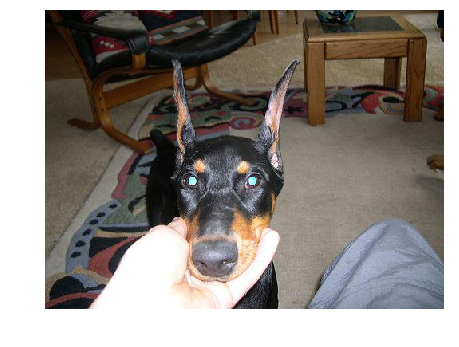


chihuahua : 152


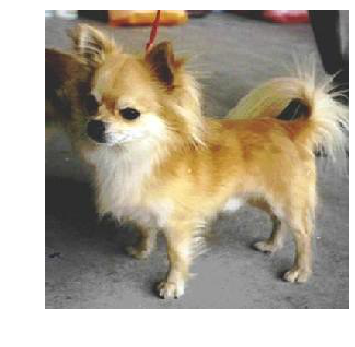


shih_tzu : 214


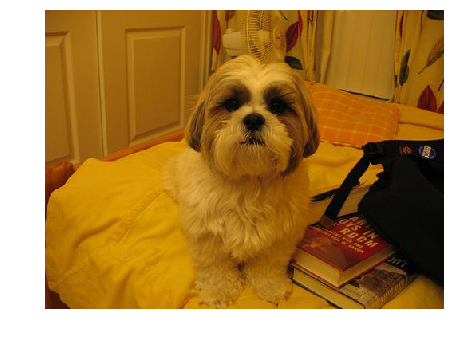


pekinese : 149


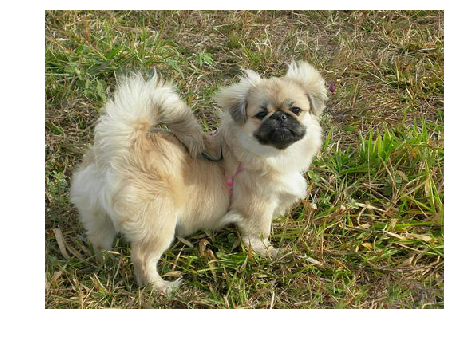


rottweiler : 152


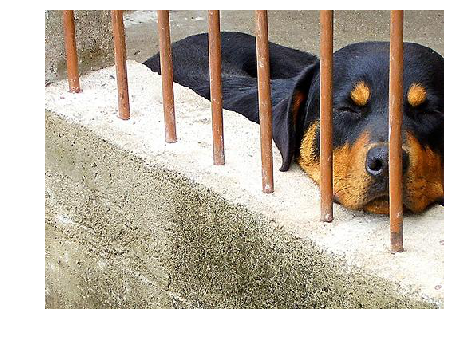


border_collie : 150


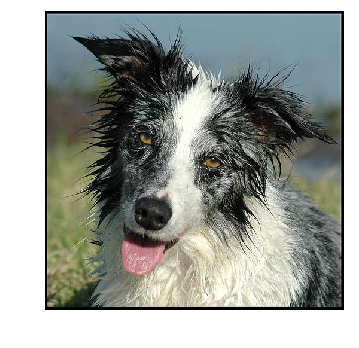

In [ ]:
# Locate the folders
root_dir = "."
image_dir = os.path.join(root_dir, "dog_data")

folders = os.listdir(os.path.join(root_dir, "dog_data"))

for folder in folders:
  if (folder != "output"):
    path_folder = os.path.join(image_dir, folder)
    files = os.listdir(path_folder) 

    # Display the name of each folder, the number of files it contains and its first image
    print (folder, ":", len(files))
    image_path = os.path.join(path_folder, files[0])

    plt.imshow(imread(image_path))
    img = plt.subplot(1, 1, 1)
    plt.xlabel(folder)
    plt.ylabel(folder)
    img.axis("Off")
    show()
    print("") 

Separate the data into test and train folders.

In [ ]:
if(False):
  base_dir = os.path.join(root_dir, "/tmp/dog_data_filtered")
  all_breeds_train_dir = os.path.join(base_dir, "train")
  all_breeds_validation_dir = os.path.join(base_dir, "validation")

  all_breeds = ["border_collie", "chihauhau", "doberman", "pekinese", "rottweiler", "shih_tzu"]

  # Directories for Border Collie
  train_border_collie_dir = os.path.join(all_breeds_train_dir, all_breeds[0])
  validation_border_collie_dir = os.path.join(all_breeds_validation_dir, all_breeds[0])

  # Directories for Chihauhau
  train_chihauhau_dir = os.path.join(all_breeds_train_dir, all_breeds[1])
  validation_chihauhau_dir = os.path.join(all_breeds_validation_dir, all_breeds[1])

  # Directories for Doberman
  train_doberman_dir = os.path.join(all_breeds_train_dir, all_breeds[2])
  validation_doberman_dir = os.path.join(all_breeds_validation_dir, all_breeds[2])

  # Directories for Pekinese
  train_pekinese_dir = os.path.join(all_breeds_train_dir, all_breeds[3])
  validation_pekinese_dir = os.path.join(all_breeds_validation_dir, all_breeds[3])

  # Directories for Rottweiler
  train_rottweiler_dir = os.path.join(all_breeds_train_dir, all_breeds[4])
  validation_rottweiler_dir = os.path.join(all_breeds_validation_dir, all_breeds[4])

  # Directories for Shih Tzu
  train_shih_tzu_dir = os.path.join(all_breeds_train_dir, all_breeds[5])
  validation_shih_tzu_dir = os.path.join(all_breeds_validation_dir, all_breeds[5])

From browsing through the data, I noticed that some of the images may be particularly hard to classify. Examples of these include pictures where the dog is very small or obscured, pictures where the dog is not real and pictures with more than one dog in them (sometimes the other dogs are even of different breeds). You can see a few examples of this by running the next section of code.

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


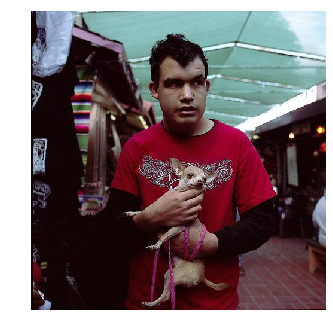

This Chihauhau is greatly obscured


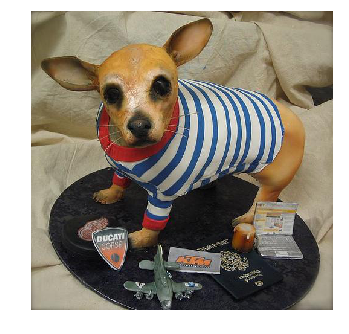

This Chihauhau is not real


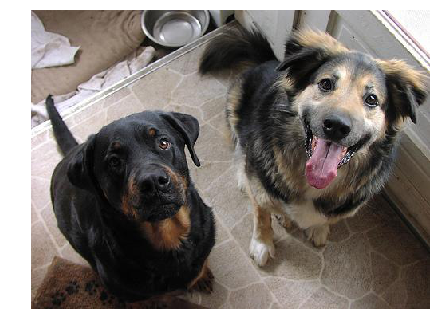

This Rottweiler has another dog in the photo


In [ ]:
difficult_images = [0, 0, 0]
message = ["This Chihauhau is greatly obscured", "This Chihauhau is not real", "This Rottweiler has another dog in the photo"]
dif_count = 0
folders = os.listdir(image_dir)

for folder in folders:
    path_folder = os.path.join(image_dir, folder)
    files_directory = os.listdir(path_folder)

    # Search for difficult images
    for file in files_directory:
        if "n02085620_13383" in file:
            difficult_images[0] = os.path.join(path_folder, file)
            dif_count += 1

        elif "n02085620_1916" in file:
            difficult_images[1] = os.path.join(path_folder, file)
            dif_count += 1

        elif "n02106550_2082" in file:
            difficult_images[2] = os.path.join(path_folder, file)
            dif_count += 1

        if dif_count >= 3:
            break 
          
# Display the difficult images
for i in range(3):
  plt.imshow(imread(difficult_images[i]))
  sp_array_demo = plt.subplot(1, 1, 1)
  sp_array_demo.axis("Off")
  plt.show()
  print(message[i])

# Creating an Initial Model


## Important Imports

In [ ]:
# Run this to import the right things
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import collections
import math
import os
import random
from six.moves import urllib
import io
import shutil

from IPython.display import clear_output, Image, display, HTML


import tensorflow as tf
import tensorflow_hub as hub

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as sk_metrics
import time
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet50 import preprocess_input, decode_predictions, ResNet50
from keras.preprocessing import image
from keras import regularizers
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout, Flatten
from keras import backend as K

Using TensorFlow backend.


## Organising the data
To start with, I will only use 2 of the breeds: the Rottweiler and the Border Collie. Hopefully, this will generate a starting point that I can add to later. I will also only take the first 149 images for each breed as this is the lowest amount of images for one category (Pekinese).

I will sort the data into training, validation and test sets.

In [ ]:
max_images_per_category = 149
breeds = ["rottweiler", "border_collie"]
first_dir = os.path.join(root_dir, "try_model")

def read_images_from_dir(base_dir, folder):
    path_folder = os.path.join(base_dir, folder)
    files_directory = os.listdir(path_folder)
    
    labels = []
    images = []
    count = 0
    
    for file in files_directory:
        if file.endswith(".jpg"):
            labels.append(folder)
            images.append(os.path.join(path_folder, file))
            count += 1
            
            # Break if image count limit is exceeded
            if (count >= max_images_per_category):
              break
            
    return labels, images

def read_images(base_dir):
    labels = []
    images = []
    folders = os.listdir(image_dir)
    
    for folder in folders:
      
      # Skip categories that haven"t been preselected for inclusion in the data
      if (folder not in breeds):
        continue
        
      labels_folder, images_folder = read_images_from_dir(base_dir, folder)
      labels.extend(labels_folder)
      images.extend(images_folder)
      
    return labels, images
  
labels, images = read_images(image_dir)

In [ ]:
def create_output_folders():
    if not os.path.exists(output_folder):
        print("Creating output directories")
        os.mkdir(output_folder)
        
        if not os.path.exists(train_folder):
            os.mkdir(train_folder)
            for label in set(labels):
                os.mkdir(train_folder + "/" + label)
                
        if not os.path.exists(validation_folder):
            os.mkdir(validation_folder)
            for label in set(labels):
                os.mkdir(validation_folder + "/" + label)
                
        if not os.path.exists(test_folder):
            os.mkdir(test_folder)
            for label in set(labels):
                os.mkdir(test_folder + "/" + label)
                
def copy_files_to_train_validation_and_test_folders():            
    print("Copy training files to directory")
    for index, value in enumerate(images_train):
        dest = os.path.join(train_folder, labels_train[index])
        shutil.copy(value, dest)
        
    print("Copy validation files to directory")        
    for index, value in enumerate(images_validation):
        dest = os.path.join(validation_folder, labels_train[index])
        shutil.copy(value, validation_folder + "/" + labels_validation[index])

    print("Copy test files to directory")        
    for index, value in enumerate(images_test):
        dest = os.path.join(test_folder, labels_train[index])
        shutil.copy(value, test_folder + "/" + labels_test[index])

Splitting the data using a roughly 65%, 15%, 20% split.

In [ ]:
test_fraction = 0.2
validation_fraction = 0.1875 # 15% / 0.8 = 18.75
random_seed = 2019

# Split the data into training and test sets
images_train, images_test, labels_train, labels_test = train_test_split(
                                images, 
                                labels, 
                                test_size=test_fraction, 
                                random_state=random_seed, 
                                stratify=labels)

# Split the data into training and validation sets
images_train, images_validation, labels_train, labels_validation = train_test_split(
                                images_train, 
                                labels_train, 
                                test_size=validation_fraction, 
                                random_state=random_seed, 
                                stratify=labels_train)

labels, images = read_images(image_dir)

# Create folders for test and training that can be passed to Keras Generators
if not os.path.exists(first_dir):                              
    os.mkdir(first_dir)

output_folder = os.path.join(first_dir, "output")
train_folder = os.path.join(output_folder, "train")
validation_folder = os.path.join(output_folder, "validation")
test_folder  = os.path.join(output_folder, "test")
        
create_output_folders()
copy_files_to_train_validation_and_test_folders()

Copy training files to directory
Copy validation files to directory
Copy test files to directory


Creating some data generators for working with the data (taken from the flower example).

In [ ]:
image_size = 224
data_generator = ImageDataGenerator(rescale=1./255)

train_generator = data_generator.flow_from_directory(
    train_folder, 
    target_size=(image_size, image_size), 
    batch_size = 1, 
    class_mode = "categorical")

validation_generator = data_generator.flow_from_directory(
    validation_folder, 
    target_size = (image_size, image_size), 
    batch_size = 1, 
    class_mode = "categorical")

test_generator = data_generator.flow_from_directory(
    test_folder, 
    target_size = (image_size, image_size), 
    batch_size = 1, 
    class_mode = "categorical")

Found 193 images belonging to 2 classes.
Found 45 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


Separating the train, validation and test data into x and y values.

******************** Training data! ********************
Breed = Border Collie


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


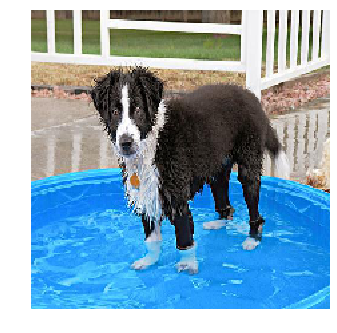

Breed = Border Collie


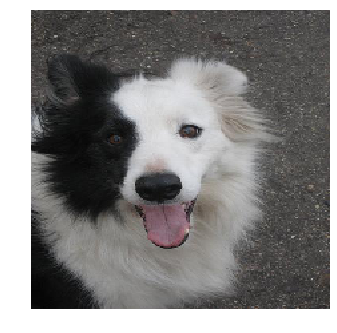

Breed = Rottweiler


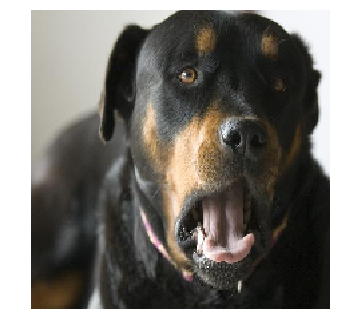


******************* Validation data! *******************
Breed = Border Collie


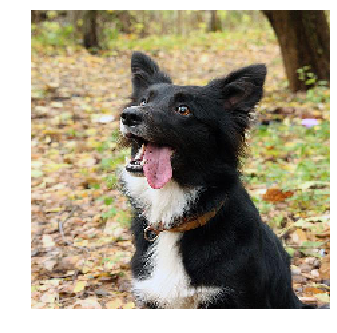

Breed = Border Collie


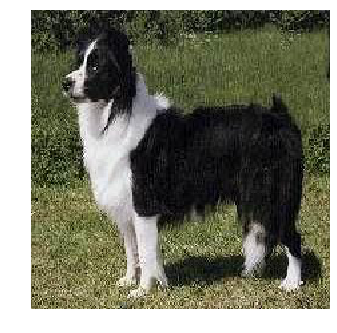

Breed = Border Collie


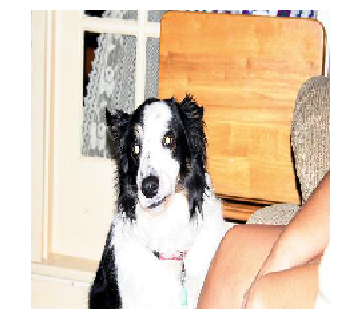


********************** Test data! **********************
Breed = Rottweiler


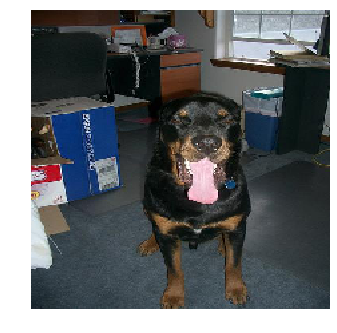

Breed = Border Collie


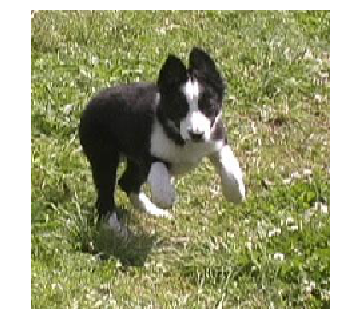

Breed = Rottweiler


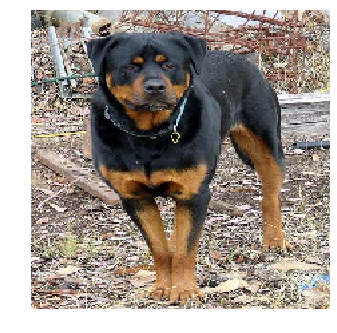

In [ ]:
disp_number = 3
breeds = ["Border Collie", "Rottweiler"]
i = 0
j = 0
k = 0

# ------------------------------- TRAINING DATA -------------------------------
# Initialise x and y to ones
x_train = np.ones((train_generator.samples, image_size, image_size, 3))
y_train = np.ones((train_generator.samples, train_generator.num_classes))

print("******************** Training data! ********************")
for image, label in train_generator:   
    x_train[i] = image
    y_train[i] = label
    i += 1
    
    if i == (round(train_generator.samples)):
      break

# Display first disp_number pieces of training data
for i in range(disp_number):
  print("Breed =", breeds[np.where(y_train[i])[0][0]] )
  
  plt.imshow(x_train[i])
  sp_array_demo = plt.subplot(1, 1, 1)
  sp_array_demo.axis("Off")
  plt.show()
    
print()


  
# ------------------------------ VALIDATION DATA ------------------------------
# Initialise x and y to ones
x_validation = np.ones((validation_generator.samples, image_size, image_size, 3))
y_validation = np.ones((validation_generator.samples, validation_generator.num_classes))

print("******************* Validation data! *******************")
for image, label in validation_generator:   
    x_validation[j] = image
    y_validation[j] = label
    j += 1
    
    if j == (round(validation_generator.samples)):
      break

# Display first disp_number pieces of validation data
for j in range(disp_number):
  print("Breed =", breeds[np.where(y_validation[j])[0][0]] )
  
  plt.imshow(x_validation[j])
  sp_array_demo = plt.subplot(1, 1, 1)
  sp_array_demo.axis("Off")       
  plt.show()
  
print()



# --------------------------------- TEST DATA ---------------------------------
# Initialise x and y to ones
x_test = np.zeros((test_generator.samples, image_size, image_size, 3))
y_test = np.zeros((test_generator.samples, test_generator.num_classes))

print("********************** Test data! **********************")
for image, label in test_generator:  
    x_test[k] = image
    y_test[k] = label   
    k += 1
    
    if k == (round(test_generator.samples)):
      break
      
# Display first disp_number pieces of test data
for k in range(disp_number):
  print("Breed =", breeds[np.where(y_test[k])[0][0]] )
  
  plt.imshow(x_test[k])
  sp_array_demo = plt.subplot(1, 1, 1)
  sp_array_demo.axis("Off")       
  plt.show()

## Building the model

In [ ]:
from keras import layers
from keras import models

from keras import optimizers
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt

In [ ]:
simple_model = models.Sequential()
simple_model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))
simple_model.add(layers.MaxPooling2D((2, 2)))
simple_model.add(layers.Conv2D(64, (3, 3), activation="relu"))
simple_model.add(layers.MaxPooling2D((2, 2)))
simple_model.add(layers.Conv2D(128, (3, 3), activation="relu"))
simple_model.add(layers.MaxPooling2D((2, 2)))
simple_model.add(layers.Conv2D(128, (3, 3), activation="relu"))
simple_model.add(layers.MaxPooling2D((2, 2)))
simple_model.add(layers.Flatten())
simple_model.add(layers.Dense(512, activation="relu"))
simple_model.add(layers.Dense(2, activation="sigmoid"))
simple_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv

## Training the model

In [ ]:
simple_model.compile(loss="binary_crossentropy",
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=["acc"])

history = simple_model.fit_generator(train_generator,
                                     steps_per_epoch=253,
                                     epochs=25,
                                     validation_data=validation_generator,
                                     validation_steps=86)

Instructions for updating:
Use tf.cast instead.
Epoch 1/25
253/253 [==============================] - 7s 29ms/step - loss: 0.6921 - acc: 0.5909 - val_loss: 0.5668 - val_acc: 0.6744
Epoch 2/25
253/253 [==============================] - 5s 21ms/step - loss: 0.4644 - acc: 0.7846 - val_loss: 0.6280 - val_acc: 0.6744
Epoch 3/25
253/253 [==============================] - 5s 21ms/step - loss: 0.4628 - acc: 0.7925 - val_loss: 0.3497 - val_acc: 0.8488
Epoch 4/25
253/253 [==============================] - 5s 21ms/step - loss: 0.3359 - acc: 0.8379 - val_loss: 0.4775 - val_acc: 0.8140
Epoch 5/25
253/253 [==============================] - 5s 21ms/step - loss: 0.2708 - acc: 0.8854 - val_loss: 0.5936 - val_acc: 0.7907
Epoch 6/25
253/253 [==============================] - 5s 21ms/step - loss: 0.1704 - acc: 0.9466 - val_loss: 0.8679 - val_acc: 0.7907
Epoch 7/25
253/253 [==============================] - 5s 21ms/step - loss: 0.1036 - acc: 0.9565 - val_loss: 0.8209 - val_acc: 0.7558
Epoch 8/25
253/253 [=

## Visualising the model

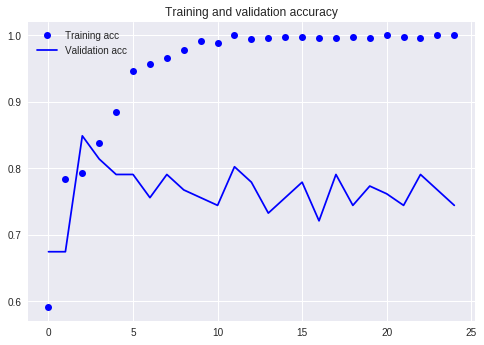

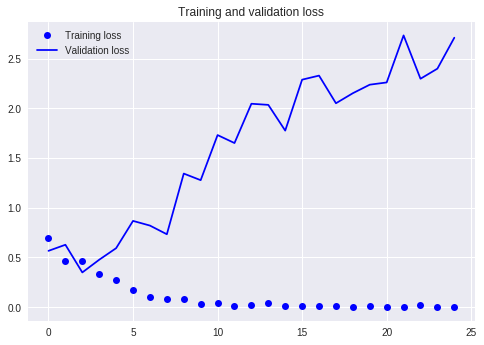

In [ ]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

##Testing the model

In [ ]:
# evaluate the model on the test data
test_loss, test_acc = simple_model.evaluate(x_test, y_test)
print (test_acc)

60/60 [==============================] - 1s 11ms/step
0.8166666547457377


There seems to be an overfitting problem from just after the 5th epoch. Nevertheless, this model still manages to achieve a test accuracy of around 82%, even after 25 epochs.

Displaying confusion matrix.

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

Confusion matrix, without normalization
[[24  6]
 [ 5 25]]


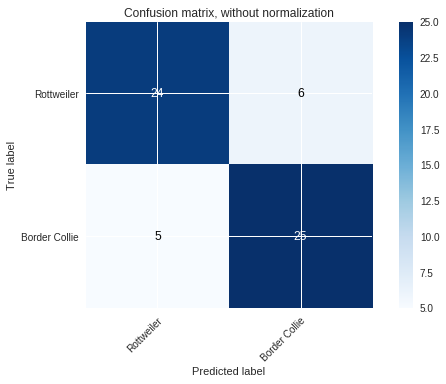

In [ ]:
# Make predictions
y_pred = simple_model.predict(x_test, steps=1)

# Convert to one hot encoding
for i in range(len(y_pred)):
  current_y = y_pred[i]
  
  new_line = np.zeros(2)
  new_line[np.argmax(current_y)] = 1
  y_pred[i] = new_line

  
# Confusion matrix code (taken from scikit):
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)
def plot_confusion_matrix(y_true, 
                          y_pred, 
                          classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
  
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = "Normalized confusion matrix"
        else:
            title = "Confusion matrix, without normalization"
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation="nearest", cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel="True label",
           xlabel="Predicted label")

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

breed_classes = {"Border Collie",  "Rottweiler"}

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test.argmax(axis=1), 
                      y_pred.argmax(axis=1), 
                      classes=breed_classes,
                      title="Confusion matrix, without normalization")

plt.show()

The confusion matrix confirms that the model is dealing well with the data.

Uncomment below code to save the current model. The previously saved one had 92% test accuracy.

In [ ]:
#simple_model.save("rottweiler_and_border_collie")

# Creating a More Advanced Model
Now that we have seen that it is possible to differentiate between two breeds of dogs that somewhat resemble each other (with at least 80% test accuracy), I will now try to build a classifier that will work for six.

## Organising the data
Now I will take data for six dog breeds: Rottweiler, Border Collie, Doberman, Chihauhau, Pekinese and Shih Tzu. Remembering to take only the first 149 images for each breed as this is the lowest amount of images for one category (Pekinese).

In [ ]:
max_images_per_category = 149
advanced_dir = os.path.join(root_dir, "all_breed_model")

def read_images_from_dir(base_dir, folder):
    path_folder = os.path.join(base_dir, folder)
    files_directory = os.listdir(path_folder)
    
    labels = []
    images = []
    count = 0
    
    for file in files_directory:
        if file.endswith(".jpg"):
            labels.append(folder)
            images.append(os.path.join(path_folder, file))
            count += 1
            
            # Break if image count limit is exceeded
            if (count >= max_images_per_category):
              break
            
    return labels, images

def read_images(base_dir):
    labels = []
    images = []
    folders = os.listdir(image_dir)
    
    for folder in folders:        
      labels_folder, images_folder = read_images_from_dir(base_dir, folder)
      labels.extend(labels_folder)
      images.extend(images_folder)
      
    return labels, images
  
labels, images = read_images(image_dir)

I will continue to use a 65%, 15%, 20% data split.

In [ ]:
test_fraction = 0.2
validation_fraction = 0.1875 # 15% / 0.8 = 18.75
random_seed = 2019

# Split the data into training and test sets
images_train, images_test, labels_train, labels_test = train_test_split(
                                images, 
                                labels, 
                                test_size=test_fraction, 
                                random_state=random_seed, 
                                stratify=labels)

# Split the data into training and validation sets
images_train, images_validation, labels_train, labels_validation = train_test_split(
                                images_train, 
                                labels_train, 
                                test_size=validation_fraction, 
                                random_state=random_seed, 
                                stratify=labels_train)

labels, images = read_images(image_dir)

# Create folders for test and training that can be passed to Keras Generators
if not os.path.exists(advanced_dir):                              
    os.mkdir(advanced_dir)

output_folder = os.path.join(advanced_dir, "output")
train_folder = os.path.join(output_folder, "train")
validation_folder = os.path.join(output_folder, "validation")
test_folder  = os.path.join(output_folder, "test")
        
create_output_folders()
copy_files_to_train_validation_and_test_folders()

Copy training files to directory
Copy validation files to directory
Copy test files to directory


In [ ]:
image_size = 224
data_generator = ImageDataGenerator(rescale=1./255)

train_generator = data_generator.flow_from_directory(
    train_folder, 
    target_size=(image_size, image_size), 
    batch_size = 1, 
    class_mode = "categorical")

validation_generator = data_generator.flow_from_directory(
    validation_folder, 
    target_size = (image_size, image_size), 
    batch_size = 1, 
    class_mode = "categorical")

test_generator = data_generator.flow_from_directory(
    test_folder, 
    target_size = (image_size, image_size), 
    batch_size = 1, 
    class_mode = "categorical")

Found 580 images belonging to 6 classes.
Found 135 images belonging to 6 classes.
Found 179 images belonging to 6 classes.


Let"s create our x and y values and then check everything is working.

******************** Training data! ********************
Breeds = [Border Collie, Chihauhau, Doberman, Pekinese, Rottweiler, Shih Tzu]
Breed = Shih Tzu


/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


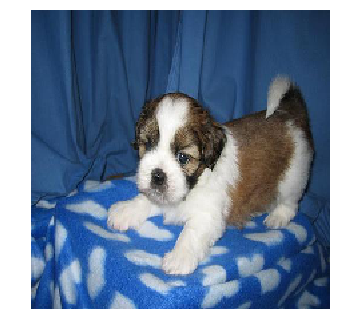

Breed = Pekinese


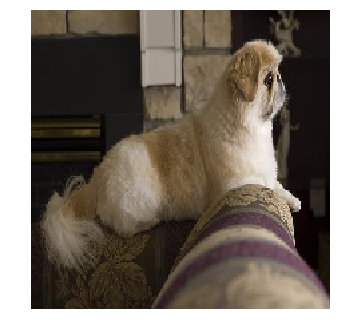

Breed = Doberman


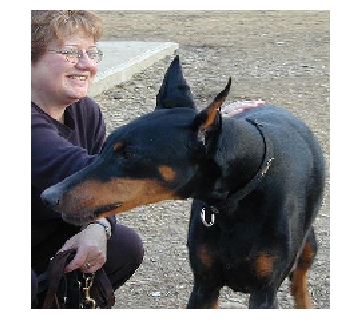


******************* Validation data! *******************
Breed = Chihauhau


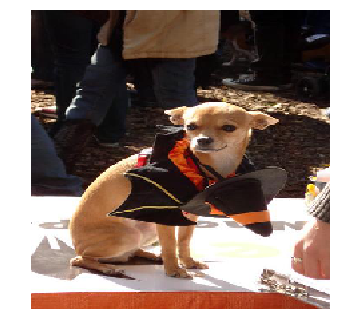

Breed = Border Collie


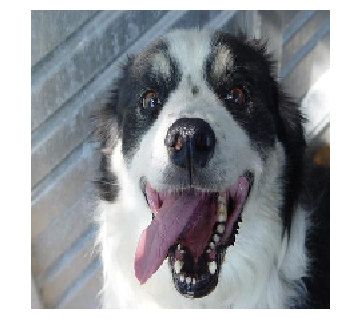

Breed = Rottweiler


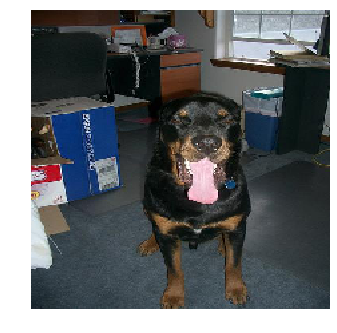


********************** Test data! **********************
Breed = Chihauhau


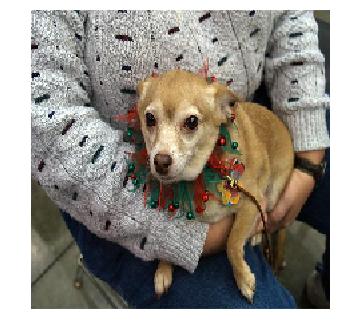

Breed = Border Collie


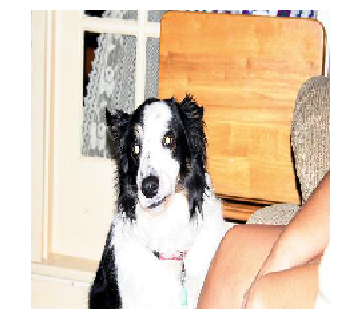

Breed = Doberman


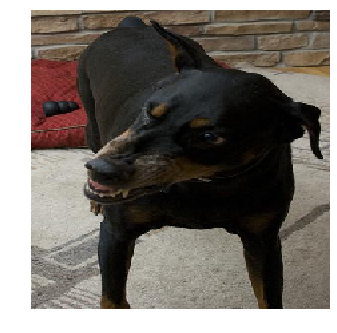

In [ ]:
disp_number = 3
breeds = ["Border Collie", "Chihauhau", "Doberman", "Pekinese", "Rottweiler", "Shih Tzu"]
i = 0
j = 0
k = 0

# ------------------------------- TRAINING DATA -------------------------------
# Initialise x and y to ones
x_train = np.ones((train_generator.samples, image_size, image_size, 3))
y_train = np.ones((train_generator.samples, train_generator.num_classes))

print("******************** Training data! ********************")
print("Breeds = [Border Collie, Chihauhau, Doberman, Pekinese, Rottweiler, Shih Tzu]")
for image, label in train_generator:   
    x_train[i] = image
    y_train[i] = label
    i += 1
    
    if i == (round(train_generator.samples)):
      break
      
# Display first disp_number pieces of training data
for i in range(disp_number):
  print("Breed =", breeds[np.where(y_train[i])[0][0]] )
  
  plt.imshow(x_train[i])
  sp_array_demo = plt.subplot(1, 1, 1)
  sp_array_demo.axis("Off")
  plt.show()
    
print()


  
# ------------------------------ VALIDATION DATA ------------------------------
# Initialise x and y to ones
x_validation = np.ones((validation_generator.samples, image_size, image_size, 3))
y_validation = np.ones((validation_generator.samples, validation_generator.num_classes))

print("******************* Validation data! *******************")
for image, label in validation_generator:   
    x_validation[j] = image
    y_validation[j] = label
    j += 1
    
    if j == (round(validation_generator.samples)):
      break

# Display first disp_number pieces of validation data
for j in range(disp_number):
  print("Breed =", breeds[np.where(y_validation[j])[0][0]] )
  
  plt.imshow(x_validation[j])
  sp_array_demo = plt.subplot(1, 1, 1)
  sp_array_demo.axis("Off")       
  plt.show()
  
print()



# --------------------------------- TEST DATA ---------------------------------
# Initialise x and y to ones
x_test = np.zeros((test_generator.samples, image_size, image_size, 3))
y_test = np.zeros((test_generator.samples, test_generator.num_classes))

print("********************** Test data! **********************")
for image, label in test_generator:  
    x_test[k] = image
    y_test[k] = label   
    k += 1
    
    if k == (round(test_generator.samples)):
      break
      
# Display first disp_number pieces of test data
for k in range(disp_number):
  print("Breed =", breeds[np.where(y_test[k])[0][0]] )
  
  plt.imshow(x_test[k])
  sp_array_demo = plt.subplot(1, 1, 1)
  sp_array_demo.axis("Off")       
  plt.show()

## Building the model

Starting with the same model as the previous task except that the sigmoid activation function in the output layer is changed to a softmax function as it is no longer a binary output but a 6 class output.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(6, activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 128)       147584    
__________

## Training the model

The loss function has been changed from "binary_crossentropy" to "categorical_crossentropy" to reflect the new nature of the task.

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=["acc"])

history = model.fit_generator(train_generator,
                    steps_per_epoch=580,
                    epochs=15,
                    validation_data=validation_generator,
                    validation_steps=135)

Epoch 1/15
580/580 [==============================] - 10s 17ms/step - loss: 1.7762 - acc: 0.2155 - val_loss: 1.6833 - val_acc: 0.2593
Epoch 2/15
580/580 [==============================] - 9s 15ms/step - loss: 1.5919 - acc: 0.3293 - val_loss: 1.5133 - val_acc: 0.3852
Epoch 3/15
580/580 [==============================] - 9s 15ms/step - loss: 1.4347 - acc: 0.3983 - val_loss: 1.5621 - val_acc: 0.3259
Epoch 4/15
580/580 [==============================] - 9s 15ms/step - loss: 1.3291 - acc: 0.4655 - val_loss: 1.5520 - val_acc: 0.3704
Epoch 5/15
580/580 [==============================] - 9s 15ms/step - loss: 1.2414 - acc: 0.4983 - val_loss: 1.5750 - val_acc: 0.3926
Epoch 6/15
580/580 [==============================] - 9s 15ms/step - loss: 1.1453 - acc: 0.5431 - val_loss: 1.4936 - val_acc: 0.3778
Epoch 7/15
580/580 [==============================] - 9s 15ms/step - loss: 1.0804 - acc: 0.5707 - val_loss: 1.7754 - val_acc: 0.3481
Epoch 8/15
580/580 [==============================] - 9s 15ms/step -

## Visualising the model

Display the training and validation accuracy and loss values.

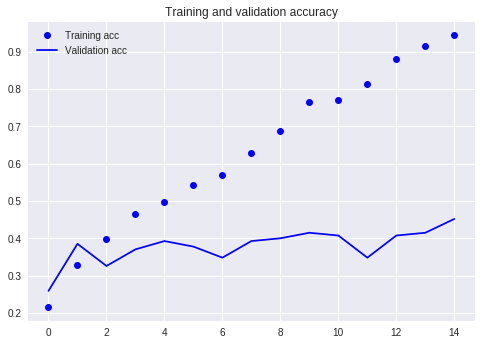

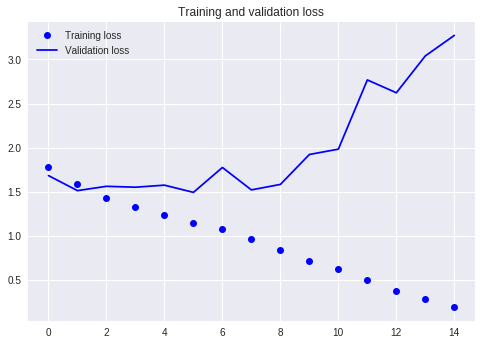

In [ ]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

It appears that there is a problem of overfitting starting from around the 8th epoch but the validation accuracy continues to rise regardless.

## Testing the model

In [ ]:
# evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print (test_acc)

179/179 [==============================] - 1s 3ms/step
0.47486033486254386


Around 47% for the test accuracy. Although this is not exactly a high score, it is much better than the 16.67% that would be achieved by chance or by selecting one category for everything.

Next, let's take a look at the confusion matrix.

Confusion matrix, without normalization
[[17  0  2  3  2  6]
 [ 2 11  1  8  2  6]
 [ 5  2 11  2 10  0]
 [ 1  7  2 15  2  3]
 [ 4  0  6  1 18  0]
 [ 3  4  1  7  2 13]]


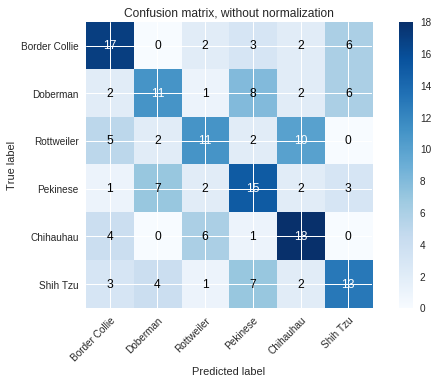

In [ ]:
# Make predictions
y_pred = model.predict(x_test, steps=1)

# Convert to one hot encoding
for i in range(len(y_pred)):
  current_y = y_pred[i]
  
  new_line = np.zeros(6)
  new_line[np.argmax(current_y)] = 1
  y_pred[i] = new_line

np.set_printoptions(precision=2)

breed_classes = {"Border Collie", "Chihauhau", "Doberman", "Pekinese", "Rottweiler", "Shih Tzu"}

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test.argmax(axis=1), 
                      y_pred.argmax(axis=1), 
                      classes=breed_classes,
                      title="Confusion matrix, without normalization")

plt.show()

The performance is not usually well-tuned enough at this point to generate any consistency in the confusion matrices, although there is a very vague diagonal starting to appear.

Uncomment below code to save the model. The previously saved model had a 40% test accuracy.

In [ ]:
#model.save("all_breeds_model")

# Tweaking the Advanced Model

We can build a model that reliably predict the 6 breeds with 35% to 40% (test) accuracy. This is much better than random for 6 categories, which would only be correect in about 17% of case. There, I will use this as a starting point and work on tweaking the model.

From the training and validation accuracy graph, the training set tends to perform a fair bit better than the validation set. This is likely due to overfitting, so my next step will be to try and reduce this through data audmentation and regularisation.

## Data augmentation

Apply augmentation and add it to the training data.

In [ ]:
batchsize = 1

augmentations_per_image = 4        

#Augmenting the data
aug_datagen = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=20,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  fill_mode="nearest",
                  shear_range=0.2,
                  zoom_range=0.1,
                  horizontal_flip=True)

aug_train_generator = aug_datagen.flow_from_directory(
                        train_folder,
                        target_size=(224, 224),
                        batch_size=1,
                        class_mode="categorical")

# Add the augmented data to the training data 
new_length = aug_train_generator.samples * (augmentations_per_image + 1)
x_train = np.ones((new_length, image_size, image_size, 3))
y_train = np.ones((new_length, aug_train_generator.num_classes))
                             
i = 0
for data_of_batch, label_of_batch in aug_train_generator:         
    x_train[i] = data_of_batch
    y_train[i] = label_of_batch    
    i = i + 1    
    if i == new_length:
      break                  
index = i

Found 580 images belonging to 6 classes.


Print out some of the new images to check that they have been correctly augmented.

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


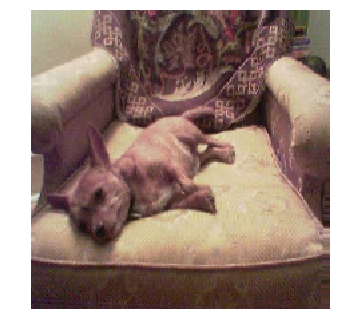

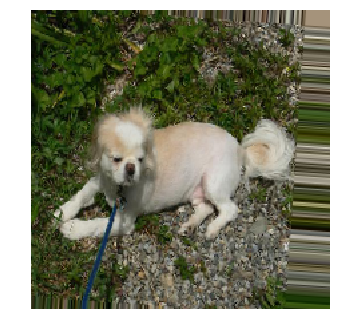

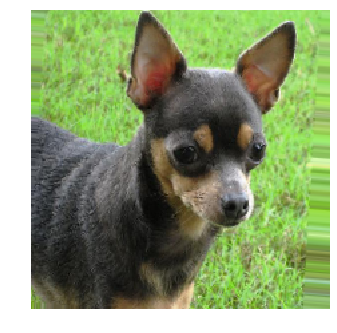

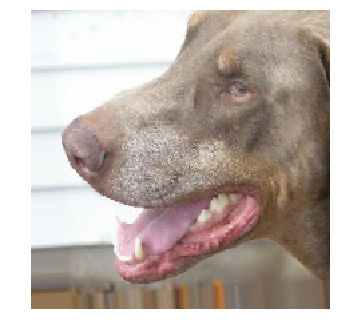

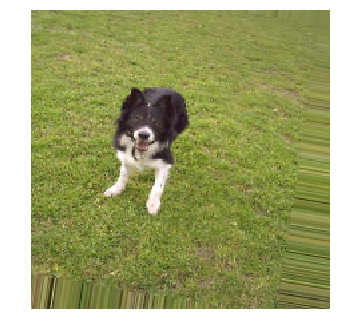

In [ ]:
# Display some augmented images
for i in range(5):
  plt.imshow(x_train[i])
  sp_array_demo = plt.subplot(1, 1, 1)
  sp_array_demo.axis("Off")
  plt.show()

Run the model again with the newly augmented training data.

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=["acc"])

aug_history = model.fit_generator(aug_train_generator,
                                  steps_per_epoch=580,
                                  epochs=15,
                                  validation_data=validation_generator,
                                  validation_steps=135,
                                  verbose=1)

Epoch 1/15
580/580 [==============================] - 15s 26ms/step - loss: 1.4301 - acc: 0.4983 - val_loss: 1.5758 - val_acc: 0.4296
Epoch 2/15
580/580 [==============================] - 14s 25ms/step - loss: 1.2022 - acc: 0.5276 - val_loss: 1.6186 - val_acc: 0.3630
Epoch 3/15
580/580 [==============================] - 14s 25ms/step - loss: 1.1735 - acc: 0.5448 - val_loss: 1.4630 - val_acc: 0.4889
Epoch 4/15
580/580 [==============================] - 14s 25ms/step - loss: 1.1850 - acc: 0.5293 - val_loss: 1.4269 - val_acc: 0.4815
Epoch 5/15
580/580 [==============================] - 14s 25ms/step - loss: 1.1644 - acc: 0.5397 - val_loss: 1.3795 - val_acc: 0.4444
Epoch 6/15
580/580 [==============================] - 14s 25ms/step - loss: 1.0857 - acc: 0.5966 - val_loss: 1.5876 - val_acc: 0.4519
Epoch 7/15
580/580 [==============================] - 14s 25ms/step - loss: 1.0740 - acc: 0.5845 - val_loss: 1.3791 - val_acc: 0.5185
Epoch 8/15
580/580 [==============================] - 14s 25ms

Let"s check the accuracy and loss graphs.

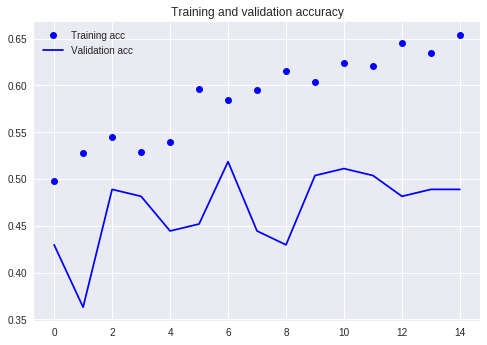

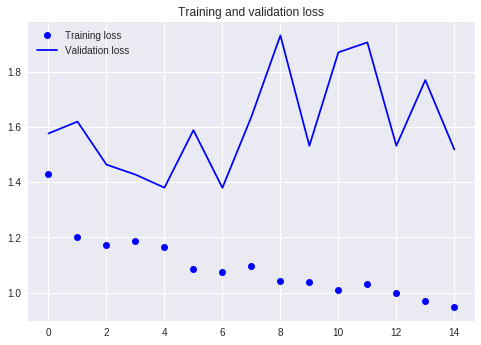

In [ ]:
acc = aug_history.history["acc"]
val_acc = aug_history.history["val_acc"]
loss = aug_history.history["loss"]
val_loss = aug_history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

And also check the test data accuracy.

In [ ]:
# evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print (test_acc)

179/179 [==============================] - 0s 2ms/step
0.44692737396868915


The data augmentation doesn't have much of an effect, it usually increases the accuracy by 1-2%. However, in this case it has actually decreased the performance to around 45%.

Let's see if regularisation can make a difference. 

## Regularisation

I'll create a new model with an added droupout layer.

In [ ]:
reg_model = models.Sequential()
reg_model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)))
reg_model.add(BatchNormalization())
reg_model.add(layers.MaxPooling2D((2, 2)))
reg_model.add(layers.Conv2D(64, (3, 3), activation="relu"))
reg_model.add(layers.MaxPooling2D((2, 2)))
reg_model.add(layers.Conv2D(128, (3, 3), activation="relu"))
reg_model.add(layers.MaxPooling2D((2, 2)))
reg_model.add(layers.Conv2D(128, (3, 3), activation="relu"))
reg_model.add(layers.MaxPooling2D((2, 2)))
reg_model.add(layers.Conv2D(128, (3, 3), activation="relu"))
reg_model.add(layers.MaxPooling2D((2, 2)))
reg_model.add(layers.Flatten())
reg_model.add(layers.Dense(512, activation="relu"))
reg_model.add(Dropout(0.2))
reg_model.add(layers.Dense(6, activation="softmax"))
reg_model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 222, 222, 32)      128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 128)       73856     
___________________________

Now, let's try running the new model while also listening to the loss values incase it needs to be stopped early.

In [ ]:
reg_model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=["acc"])

early_stop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=8)

reg_history = reg_model.fit_generator(train_generator,
                                      steps_per_epoch=580,
                                      epochs=20,
                                      validation_data=validation_generator,
                                      validation_steps=134,
                                      verbose=1)

Epoch 1/20
580/580 [==============================] - 11s 18ms/step - loss: 1.7744 - acc: 0.2138 - val_loss: 1.7906 - val_acc: 0.2313
Epoch 2/20
580/580 [==============================] - 10s 17ms/step - loss: 1.5851 - acc: 0.3690 - val_loss: 1.6267 - val_acc: 0.3358
Epoch 3/20
580/580 [==============================] - 10s 17ms/step - loss: 1.3891 - acc: 0.4431 - val_loss: 2.0541 - val_acc: 0.3284
Epoch 4/20
580/580 [==============================] - 10s 17ms/step - loss: 1.2641 - acc: 0.5086 - val_loss: 1.7785 - val_acc: 0.3582
Epoch 5/20
580/580 [==============================] - 10s 17ms/step - loss: 1.0724 - acc: 0.5879 - val_loss: 2.0986 - val_acc: 0.3433
Epoch 6/20
580/580 [==============================] - 10s 17ms/step - loss: 0.8761 - acc: 0.6621 - val_loss: 2.0561 - val_acc: 0.3284
Epoch 7/20
580/580 [==============================] - 10s 17ms/step - loss: 0.7054 - acc: 0.7431 - val_loss: 2.3124 - val_acc: 0.3731
Epoch 8/20
580/580 [==============================] - 10s 17ms

And let's also check the accuracy, loss graphs and the test accuracy again.

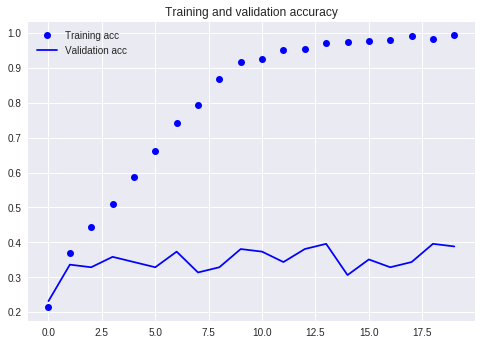

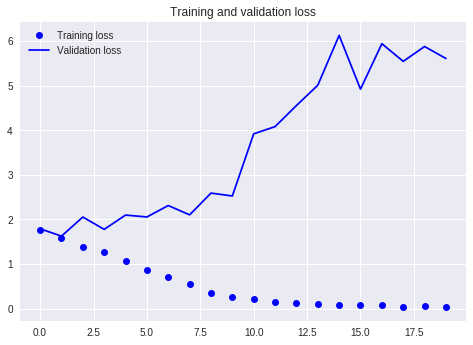

In [ ]:
acc = reg_history.history["acc"]
val_acc = reg_history.history["val_acc"]
loss = reg_history.history["loss"]
val_loss = reg_history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [ ]:
# evaluate the model on the test data
test_loss, test_acc = reg_model.evaluate(x_test, y_test)
print (test_acc)

179/179 [==============================] - 0s 2ms/step
0.4469273746346628


That didn't actually make much difference to the performance. These is an obvious problem of overfitting but it seems like it would be easier to use a pre-trained model at this point. Hopefully, this will allow us to get and accuracy of at least 50%.

# Pre-Trained Model: VGG16

For the next section I will be using the VGG16 model.



## Loading the model

Imports from keras and model download.

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dense

vgg_model = VGG16(weights="imagenet")

## Building the model

In [ ]:
vgg_transfer_model = Sequential()
for layer in vgg_model.layers[:-2]:
  vgg_transfer_model.add(layer)
for layer in vgg_transfer_model.layers:
  layer.trainable=False
vgg_transfer_model.add(Dense(512, activation = 'relu'))
vgg_transfer_model.add(Dense(6, activation='softmax'))
vgg_transfer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

## Training the model
Now we can train the VGG16 model with our data.

In [ ]:
vgg_transfer_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

vgg_history = vgg_transfer_model.fit_generator(train_generator,
                                               steps_per_epoch=58,
                                               epochs=15,
                                               validation_data=validation_generator,
                                               validation_steps=134,
                                               verbose=1)

Epoch 1/15
58/58 [==============================] - 7s 117ms/step - loss: 2.5748 - acc: 0.1552 - val_loss: 2.0111 - val_acc: 0.2090
Epoch 2/15
58/58 [==============================] - 6s 96ms/step - loss: 1.8748 - acc: 0.1724 - val_loss: 2.0131 - val_acc: 0.1791
Epoch 3/15
58/58 [==============================] - 6s 96ms/step - loss: 1.8528 - acc: 0.3103 - val_loss: 1.7756 - val_acc: 0.2612
Epoch 4/15
58/58 [==============================] - 6s 95ms/step - loss: 1.9472 - acc: 0.1552 - val_loss: 1.7655 - val_acc: 0.2537
Epoch 5/15
58/58 [==============================] - 6s 96ms/step - loss: 1.7909 - acc: 0.2586 - val_loss: 1.9216 - val_acc: 0.2388
Epoch 6/15
58/58 [==============================] - 6s 97ms/step - loss: 1.7917 - acc: 0.2069 - val_loss: 1.9090 - val_acc: 0.1716
Epoch 7/15
58/58 [==============================] - 6s 97ms/step - loss: 1.8448 - acc: 0.2069 - val_loss: 1.7905 - val_acc: 0.1940
Epoch 8/15
58/58 [==============================] - 6s 96ms/step - loss: 1.8412 - 

## Visualising the performance

Let's see how it's performing.

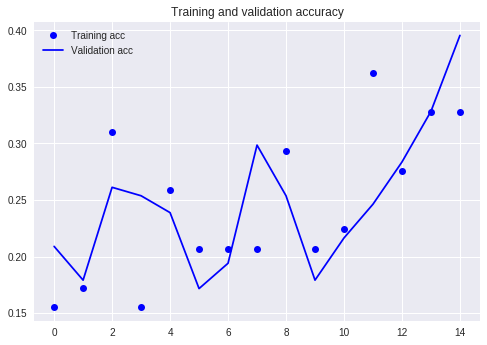

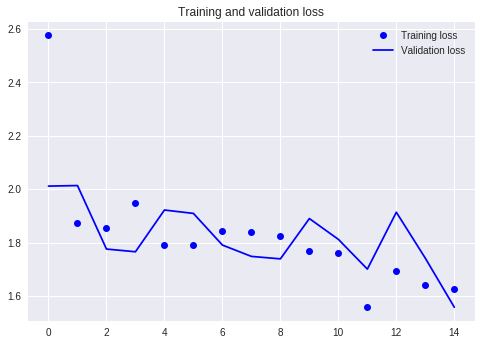

In [ ]:
acc = vgg_history.history["acc"]
val_acc = vgg_history.history["val_acc"]
loss = vgg_history.history["loss"]
val_loss = vgg_history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [ ]:
# evaluate the model on the test data
test_loss, test_acc = vgg_transfer_model.evaluate(x_test, y_test)
print (test_acc)

179/179 [==============================] - 7s 37ms/step
0.3407821239039885


The VGG16 model is still only managing to score a 34% in the test accuracy, it's performance is far worse than our previous model.

Let's see if some data augmentation can help improve it at all.

# Tweaking VGG16


## Data augmentation

In [ ]:
vgg_datagen = ImageDataGenerator(rescale=1./255,
                                       rotation_range=30,
                                       width_shift_range=0.1,
                                       height_shift_range=0.2,
                                       fill_mode="nearest",
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True)

vgg_valid_datagen = ImageDataGenerator(rescale=1./255)

vgg_generator_train = vgg_datagen.flow_from_directory(
                          train_folder,
                          target_size=(224, 224),
                          batch_size=5,
                          class_mode='categorical')

vgg_generator_validation = vgg_valid_datagen.flow_from_directory(
                               validation_folder,
                               target_size=(224, 224),
                               batch_size=1,
                               class_mode='categorical')

num_samples = len(vgg_generator_train.filenames)
steps_pe = num_samples / vgg_generator_train.batch_size

num_val_samples = len(vgg_generator_validation.filenames)
steps_pe_val = num_val_samples / vgg_generator_validation.batch_size

Found 580 images belonging to 6 classes.
Found 135 images belonging to 6 classes.


In [ ]:
vgg_transfer_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-6),
              metrics=['acc'])

vgg_history = vgg_transfer_model.fit_generator(
                      vgg_generator_train,
                      steps_per_epoch=steps_pe,
                      epochs=30,
                      validation_data=vgg_generator_validation,
                      validation_steps=steps_pe_val,
                      verbose=1)

Epoch 1/30
116/116 [==============================] - 19s 160ms/step - loss: 1.5760 - acc: 0.3983 - val_loss: 1.5113 - val_acc: 0.3926
Epoch 2/30
116/116 [==============================] - 17s 143ms/step - loss: 1.5572 - acc: 0.3845 - val_loss: 1.5098 - val_acc: 0.3926
Epoch 3/30
116/116 [==============================] - 17s 143ms/step - loss: 1.5718 - acc: 0.3862 - val_loss: 1.4993 - val_acc: 0.4296
Epoch 4/30
116/116 [==============================] - 17s 143ms/step - loss: 1.5520 - acc: 0.4155 - val_loss: 1.4940 - val_acc: 0.4222
Epoch 5/30
116/116 [==============================] - 17s 143ms/step - loss: 1.5460 - acc: 0.4034 - val_loss: 1.4961 - val_acc: 0.4296
Epoch 6/30
116/116 [==============================] - 17s 143ms/step - loss: 1.5409 - acc: 0.4276 - val_loss: 1.4880 - val_acc: 0.4148
Epoch 7/30
116/116 [==============================] - 17s 142ms/step - loss: 1.5456 - acc: 0.4000 - val_loss: 1.4838 - val_acc: 0.4074
Epoch 8/30
116/116 [==============================] - 1

## Visualising the data augmented performance

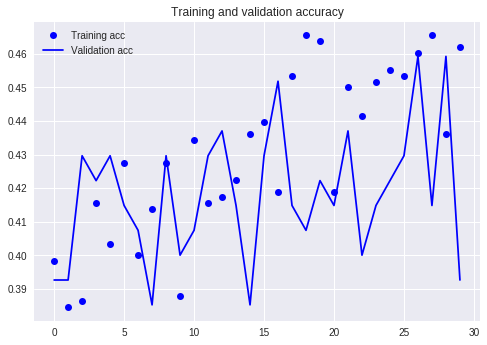

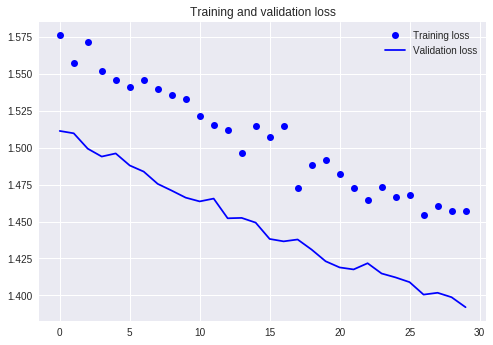

In [ ]:
acc = vgg_history.history["acc"]
val_acc = vgg_history.history["val_acc"]
loss = vgg_history.history["loss"]
val_loss = vgg_history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [ ]:
# evaluate the model on the test data
test_loss, test_acc = vgg_transfer_model.evaluate(x_test, y_test)
print (test_acc)

179/179 [==============================] - 2s 10ms/step
0.4692737425172795


Now VGG is getting 48% accuracy. That is 14% higher than before the data augmentation and it is now performing better than the first model. Perhaps  tuning a hyperparameter will finally get it to over 50%. I will focus on changing the learning rate. 

## Hyperparameter tuning: learning rate

By manually manipulating the values I discovered that a learning rate of 1e-6 worked well. So, I selected a few similar values to explore. This code compiles the VGG model using each of these values in turn. It then trains the model, displays its accuracy and loss plots and  evaluates its test predictions. At the end it returns all the final test accuracy values from all the learning rates used so that it is easy to compare them. 

Epoch 1/30
116/116 [==============================] - 18s 151ms/step - loss: 1.4858 - acc: 0.4086 - val_loss: 1.3935 - val_acc: 0.4667
Epoch 2/30
116/116 [==============================] - 17s 142ms/step - loss: 1.4395 - acc: 0.4483 - val_loss: 1.3454 - val_acc: 0.4889
Epoch 3/30
116/116 [==============================] - 17s 143ms/step - loss: 1.4332 - acc: 0.4328 - val_loss: 1.4176 - val_acc: 0.3630
Epoch 4/30
116/116 [==============================] - 17s 143ms/step - loss: 1.4350 - acc: 0.4621 - val_loss: 1.3903 - val_acc: 0.4148
Epoch 5/30
116/116 [==============================] - 17s 143ms/step - loss: 1.4208 - acc: 0.4345 - val_loss: 1.3646 - val_acc: 0.4519
Epoch 6/30
116/116 [==============================] - 17s 143ms/step - loss: 1.3888 - acc: 0.4569 - val_loss: 1.3175 - val_acc: 0.4370
Epoch 7/30
116/116 [==============================] - 17s 143ms/step - loss: 1.3810 - acc: 0.4793 - val_loss: 1.3163 - val_acc: 0.4593
Epoch 8/30
116/116 [==============================] - 1

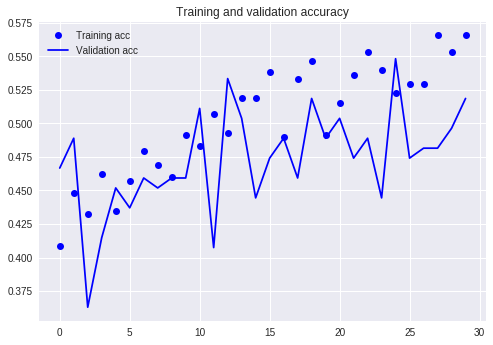

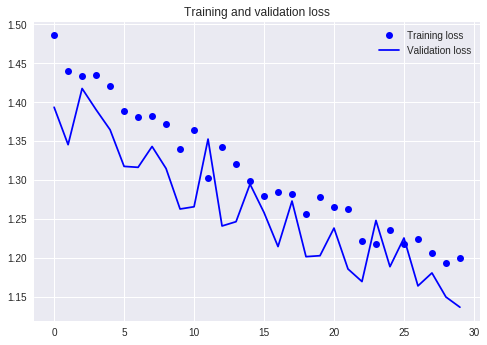

179/179 [==============================] - 2s 10ms/step
0.5251396668023903
Epoch 1/30
116/116 [==============================] - 18s 154ms/step - loss: 1.2347 - acc: 0.5172 - val_loss: 1.2796 - val_acc: 0.4370
Epoch 2/30
116/116 [==============================] - 17s 143ms/step - loss: 1.2226 - acc: 0.5017 - val_loss: 1.2038 - val_acc: 0.4667
Epoch 3/30
116/116 [==============================] - 17s 143ms/step - loss: 1.2071 - acc: 0.5224 - val_loss: 1.2015 - val_acc: 0.4519
Epoch 4/30
116/116 [==============================] - 17s 143ms/step - loss: 1.1899 - acc: 0.5345 - val_loss: 1.2110 - val_acc: 0.5037
Epoch 5/30
116/116 [==============================] - 17s 143ms/step - loss: 1.1724 - acc: 0.5362 - val_loss: 1.1042 - val_acc: 0.5852
Epoch 6/30
116/116 [==============================] - 16s 141ms/step - loss: 1.1992 - acc: 0.5379 - val_loss: 1.1306 - val_acc: 0.5111
Epoch 7/30
116/116 [==============================] - 16s 142ms/step - loss: 1.1596 - acc: 0.5690 - val_loss: 1.079

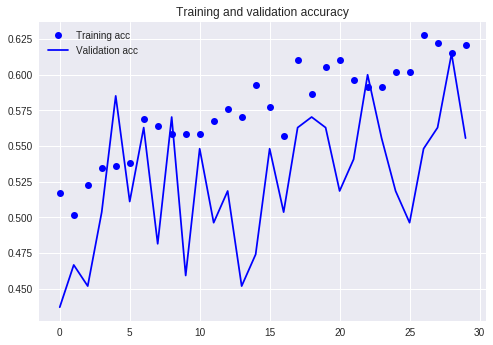

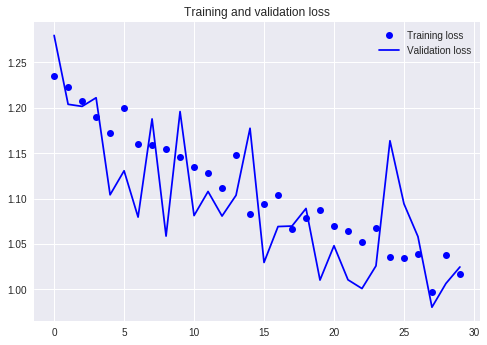

179/179 [==============================] - 2s 10ms/step
0.5865921761070549
Epoch 1/30
116/116 [==============================] - 18s 153ms/step - loss: 0.9723 - acc: 0.6810 - val_loss: 0.9495 - val_acc: 0.6074
Epoch 2/30
116/116 [==============================] - 17s 143ms/step - loss: 0.9381 - acc: 0.6759 - val_loss: 0.9461 - val_acc: 0.6148
Epoch 3/30
116/116 [==============================] - 17s 143ms/step - loss: 0.9760 - acc: 0.6586 - val_loss: 0.9634 - val_acc: 0.6000
Epoch 4/30
116/116 [==============================] - 16s 142ms/step - loss: 0.9191 - acc: 0.6966 - val_loss: 0.9661 - val_acc: 0.5926
Epoch 5/30
116/116 [==============================] - 16s 142ms/step - loss: 0.9179 - acc: 0.6966 - val_loss: 0.9177 - val_acc: 0.5852
Epoch 6/30
116/116 [==============================] - 16s 142ms/step - loss: 0.9471 - acc: 0.7069 - val_loss: 1.0107 - val_acc: 0.5778
Epoch 7/30
116/116 [==============================] - 17s 144ms/step - loss: 0.9761 - acc: 0.6862 - val_loss: 0.927

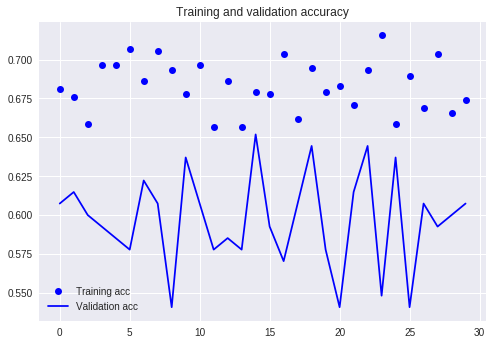

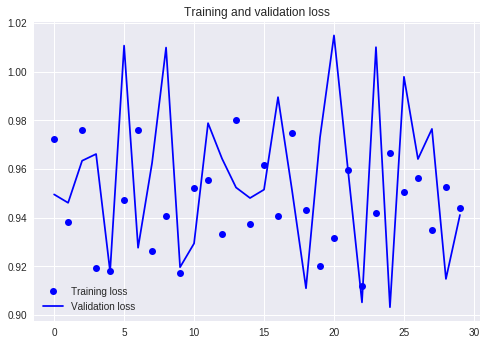

179/179 [==============================] - 2s 10ms/step
0.581005586259192
Epoch 1/30
116/116 [==============================] - 18s 157ms/step - loss: 0.9190 - acc: 0.7069 - val_loss: 1.0105 - val_acc: 0.5630
Epoch 2/30
116/116 [==============================] - 17s 145ms/step - loss: 0.9633 - acc: 0.6828 - val_loss: 0.9240 - val_acc: 0.6296
Epoch 3/30
116/116 [==============================] - 17s 144ms/step - loss: 0.9558 - acc: 0.6845 - val_loss: 0.9509 - val_acc: 0.6074
Epoch 4/30
116/116 [==============================] - 17s 144ms/step - loss: 0.9521 - acc: 0.6724 - val_loss: 1.0095 - val_acc: 0.5704
Epoch 5/30
116/116 [==============================] - 17s 146ms/step - loss: 0.9567 - acc: 0.6793 - val_loss: 0.8920 - val_acc: 0.6148
Epoch 6/30
116/116 [==============================] - 17s 143ms/step - loss: 0.9118 - acc: 0.7034 - val_loss: 1.0401 - val_acc: 0.5259
Epoch 7/30
116/116 [==============================] - 17s 145ms/step - loss: 0.9420 - acc: 0.6638 - val_loss: 0.8873

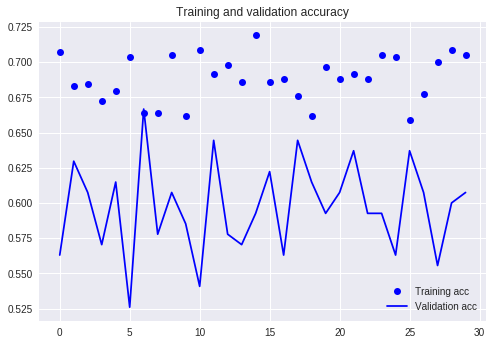

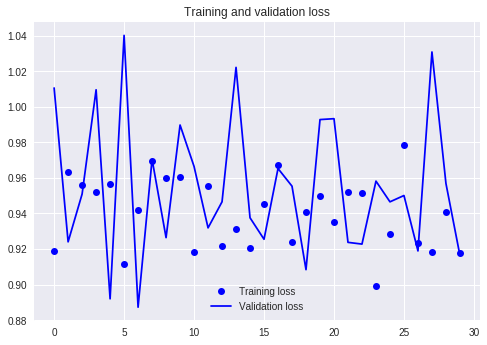

179/179 [==============================] - 2s 10ms/step
0.5921787682858259
Epoch 1/30
116/116 [==============================] - 18s 158ms/step - loss: 0.9409 - acc: 0.6810 - val_loss: 0.9243 - val_acc: 0.6370
Epoch 2/30
116/116 [==============================] - 17s 144ms/step - loss: 0.9497 - acc: 0.6707 - val_loss: 1.0035 - val_acc: 0.5556
Epoch 3/30
116/116 [==============================] - 17s 144ms/step - loss: 0.9326 - acc: 0.6931 - val_loss: 0.9059 - val_acc: 0.6444
Epoch 4/30
116/116 [==============================] - 17s 146ms/step - loss: 0.9258 - acc: 0.6862 - val_loss: 0.9053 - val_acc: 0.6444
Epoch 5/30
116/116 [==============================] - 17s 144ms/step - loss: 0.9379 - acc: 0.6845 - val_loss: 1.0053 - val_acc: 0.5481
Epoch 6/30
116/116 [==============================] - 17s 144ms/step - loss: 0.9446 - acc: 0.6655 - val_loss: 0.9140 - val_acc: 0.6222
Epoch 7/30
116/116 [==============================] - 17s 145ms/step - loss: 0.9407 - acc: 0.6707 - val_loss: 0.983

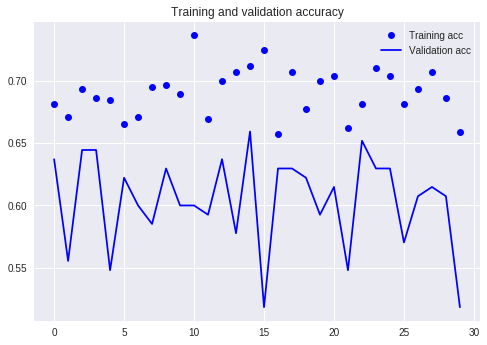

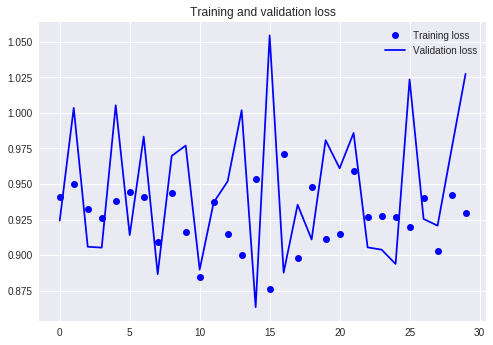

179/179 [==============================] - 2s 10ms/step
0.581005586259192
Learning rate:  5e-06  ->  0.5251396668023903
Learning rate:  1e-05  ->  0.5865921761070549
Learning rate:  5e-07  ->  0.581005586259192
Learning rate:  1e-06  ->  0.5921787682858259
Learning rate:  5e-08  ->  0.581005586259192


In [ ]:
# THIS CODE TAKES A WHILE
learning_values = [0.5e-5, 1e-5, 0.5e-6, 1e-6, 0.5e-7]
lr_accuracies = np.zeros(len(learning_values))

for i in range(len(learning_values)):
  vgg_transfer_model.compile(loss='categorical_crossentropy',
                optimizer=optimizers.RMSprop(lr=learning_values[i]),
                metrics=['acc'])

  lr_vgg_history = vgg_transfer_model.fit_generator(
                        vgg_generator_train,
                        steps_per_epoch=steps_pe,
                        epochs=30,
                        validation_data=vgg_generator_validation,
                        validation_steps=steps_pe_val,
                        verbose=1)
  
  acc = lr_vgg_history.history["acc"]
  val_acc = lr_vgg_history.history["val_acc"]
  loss = lr_vgg_history.history["loss"]
  val_loss = lr_vgg_history.history["val_loss"]

  epochs = range(len(acc))

  plt.plot(epochs, acc, "bo", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, "bo", label="Training loss")
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.legend()

  plt.show()
  
  test_loss, test_acc = vgg_transfer_model.evaluate(x_test, y_test)
  lr_accuracies[i] = test_acc
  
  print(test_acc)

for i in range(len(learning_values)):
  print ("Learning rate: ", learning_values[i], " -> ", lr_accuracies[i])

We can see that 1e-6 was the best value; with 59% test accuracy.

## Final visualisation

For the final test I decided to train the model for an additional 10 epochs to see if this would make a difference.

Epoch 1/40
116/116 [==============================] - 18s 157ms/step - loss: 0.9384 - acc: 0.6966 - val_loss: 0.9384 - val_acc: 0.5926
Epoch 2/40
116/116 [==============================] - 17s 143ms/step - loss: 0.9612 - acc: 0.6621 - val_loss: 0.9306 - val_acc: 0.6074
Epoch 3/40
116/116 [==============================] - 17s 144ms/step - loss: 0.9201 - acc: 0.6948 - val_loss: 1.0002 - val_acc: 0.5630
Epoch 4/40
116/116 [==============================] - 17s 143ms/step - loss: 0.9160 - acc: 0.7086 - val_loss: 0.9373 - val_acc: 0.6148
Epoch 5/40
116/116 [==============================] - 17s 143ms/step - loss: 0.9308 - acc: 0.6690 - val_loss: 0.9446 - val_acc: 0.5852
Epoch 6/40
116/116 [==============================] - 17s 145ms/step - loss: 0.9162 - acc: 0.6983 - val_loss: 0.9266 - val_acc: 0.6444
Epoch 7/40
116/116 [==============================] - 17s 143ms/step - loss: 0.9421 - acc: 0.6828 - val_loss: 1.0016 - val_acc: 0.5333
Epoch 8/40
116/116 [==============================] - 1

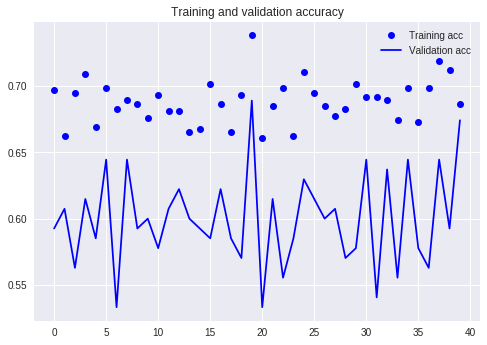

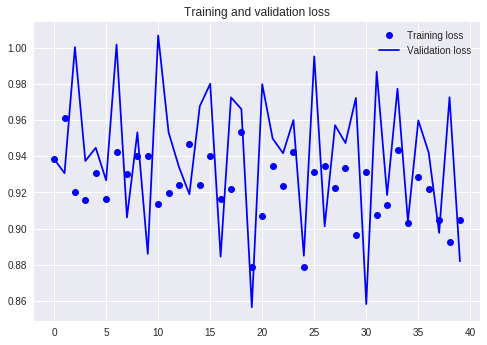

179/179 [==============================] - 2s 10ms/step


In [ ]:
vgg_transfer_model.compile(loss='categorical_crossentropy',
                optimizer=optimizers.RMSprop(lr=1e-6),
                metrics=['acc'])

final_vgg_history = vgg_transfer_model.fit_generator(
                      vgg_generator_train,
                      steps_per_epoch=steps_pe,
                      epochs=40,
                      validation_data=vgg_generator_validation,
                      validation_steps=steps_pe_val,
                      verbose=1)
  
acc = final_vgg_history.history["acc"]
val_acc = final_vgg_history.history["val_acc"]
loss = final_vgg_history.history["loss"]
val_loss = final_vgg_history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, "g", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, "g", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()
  
test_loss, test_acc = vgg_transfer_model.evaluate(x_test, y_test)
lr_accuracies[i] = test_acc

In [ ]:
# evaluate the model on the test data
test_loss, test_acc = vgg_transfer_model.evaluate(x_test, y_test)
print (test_acc)

179/179 [==============================] - 2s 10ms/step
0.5977653604645968


The additional 10 epochs don't appear to have made a significant increase in performance, only improving about 0.5%. It is therefore likely that this model with its current architecture and parameters will plateau around the 60% mark. 

Confusion matrix, without normalization
[[22  5  1  1  0  1]
 [ 1 23  3  1  2  0]
 [ 0  7 15  1  5  2]
 [ 2  5  1 10  1 11]
 [ 1  0  7  2 19  0]
 [ 4  2  1  5  0 18]]


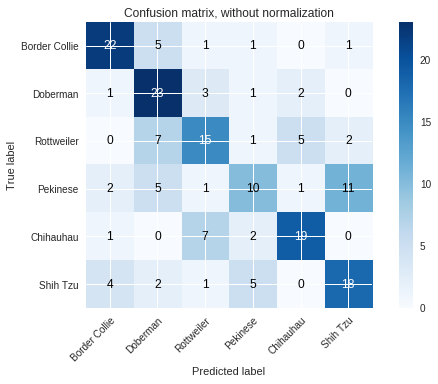

In [ ]:
# Make predictions
y_pred = vgg_transfer_model.predict(x_test, steps=1)

# Convert to one hot encoding
for i in range(len(y_pred)):
  current_y = y_pred[i]
  
  new_line = np.zeros(6)
  new_line[np.argmax(current_y)] = 1
  y_pred[i] = new_line

np.set_printoptions(precision=2)

breed_classes = {"Border Collie", "Chihauhau", "Doberman", "Pekinese", "Rottweiler", "Shih Tzu"}

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test.argmax(axis=1), 
                      y_pred.argmax(axis=1), 
                      classes=breed_classes,
                      title="Confusion matrix, without normalization")

plt.show()

This model is performing well enough that we can now see a diagonal line being shaded in across the confusion matrix. Other than that, the matrix shows us that a few of the breeds are more likely to be mistaken for each other than for other breeds. For instance, Doberman and Rottweiler tend to get confused a lot, which makes sense because those two breeds of dogs have similar size and colours. Aditionally, Pekinese and Shih Tzu are getting confused a lot, with more Pekinese being predicted to be Shih Tzus than Pekinese. These two breeds are probably the two most similar out of the data set so this also makes sense. 

# Evaluation of Models

A quick summary of the models created for this report:


1.   The initial binary model used to classify Border Collies and Rottweilers (test accuracy ~= 82%)
2.   The more advanced 6 breed classifier ( ~= 47%)
3.   The more advanced model, post-data augmentation (~= 45%)
4.   The unchanged VGG16 model (~= 34%)
5.   The VGG16 model with data augmentation (~= 48%)
6.   The VGG16 model with data augmentation after hyperparameter tuning (~= 59%)

As you can tell from the test accuracy rates, it is fairly simple to classify between two dog breeds. However, once we add multiple breeds to the picture, it becomes far more complicated. It is possible to achieve an accuracy rating of just below 50% using a relatively simple model and a few minutes of training on a standard computer. However, it is definitely possible to get up to 60% by changing the model architecture and tweaking it appropriately.





# Final Report

The best performance achieved in this report was the VGG16 model with data augmentation and some hyperparameter tuning. This model managed to attain a test accuracy of almost 60%. This was almost the same value for 30 epochs (59.2%) and 40 epochs (59.7%) so it seems that the accuracy was starting to plateau. Thus, it seems that training it any further will not cause any significant improvements to the accuracy of the model. The results with the VGG16 model are significantly better than the first model that I tried, which only managed to reach at best 47%. Both of these models completely outperformed the dummy strategies of assigning labels at random or assigning everythign to one class, which would have only reached around 16.67% accuracy. 

Throughout this report I have used test accuracy as the main point of comparison between the models. This is because the test data is not included in the training and validation sets and it can therefore be considered brand new to the models. Thus, it can be assumed to be preresentative of any incoming outside data, as would be the case if the model was ever deployed.

Given the complexity of the task, it appears that far more data and/or data of better quality is required in order to train a deep network that will get over 70% accuracy (see the end of the "Getting the Data" section). Especially, given that only 6 breeds were used in this work, out of a potential 211+ (there is some disagreement on the exact number of distinct breeds). As an increasing number of breeds are sought to be classified, the amount of good-quality data required will likely rise almost exponentially. More data would also help the models to distinguish between the more similar breeds that we noticed at the end of the "Final visualisation" sub-section. 

This initial investigation has managed to show the possibility for multiple dog breeds to be identified by a trained model, even those that are very closely related. It also highlights the importance of having a large amount of good-quality data in order to complete this task.